In [17]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
# Load the Excel file
excel_file = '../feature_ranking_plot/feature_ranking_consol.xlsx'
rankings_df = pd.read_excel(excel_file)

In [25]:
# Load the dataset from CSV file
train_dataset_file = '../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv'
dataset = pd.read_csv(train_dataset_file)
dataset = dataset.drop('level',axis=1)

In [26]:
dataset.columns = [f'f{i+1}' for i in range(len(dataset.columns))]

In [27]:
dataset

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125968,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125969,0,1,54,9,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125970,0,1,30,5,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [28]:
X  =dataset.drop('f42',axis=1)
y = dataset['f42']

In [3]:
rankings_df

,CHI_2,Fisher Score,Gain Ratio,Information Gain,Gini Index,Mutual Information,Pearson Correlation,Symmetric Uncertainty,PassiLuukaEntropy,ReliefF
0,f5,f29,f5,f5,f5,f5,f29,f12,f32,f24
1,f6,f33,f3,f3,f3,f3,f33,f4,f34,f23
2,f1,f34,f6,f6,f6,f6,f34,f26,f33,f33
3,f33,f12,f4,f30,f4,f4,f12,f39,f3,f5
4,f23,f39,f29,f4,f30,f29,f39,f25,f36,f32
5,f32,f38,f30,f29,f29,f30,f38,f30,f12,f6
6,f3,f25,f33,f33,f33,f33,f25,f38,f38,f35
7,f4,f26,f34,f34,f34,f34,f26,f3,f25,f34
8,f39,f4,f12,f35,f35,f12,f4,f29,f26,f36
9,f26,f23,f38,f38,f12,f38,f23,f5,f40,f37


In [9]:
# Extract top features from each filter method
top_features_by_method = {}
for column in rankings_df.columns:
    method_name = column  # Assuming column names are the filter method names
    top_features_by_method[method_name] = set(rankings_df[column][:10])  # Assuming you want top 10 features


In [10]:
top_features_by_method

{'CHI_2': {'f1', 'f23', 'f26', 'f3', 'f32', 'f33', 'f39', 'f4', 'f5', 'f6'},
 'Fisher Score': {'f12',
  'f23',
  'f25',
  'f26',
  'f29',
  'f33',
  'f34',
  'f38',
  'f39',
  'f4'},
 'Gain Ratio': {'f12',
  'f29',
  'f3',
  'f30',
  'f33',
  'f34',
  'f38',
  'f4',
  'f5',
  'f6'},
 'Information Gain': {'f29',
  'f3',
  'f30',
  'f33',
  'f34',
  'f35',
  'f38',
  'f4',
  'f5',
  'f6'},
 'Gini Index': {'f12',
  'f29',
  'f3',
  'f30',
  'f33',
  'f34',
  'f35',
  'f4',
  'f5',
  'f6'},
 'Mutual Information': {'f12',
  'f29',
  'f3',
  'f30',
  'f33',
  'f34',
  'f38',
  'f4',
  'f5',
  'f6'},
 'Pearson Correlation': {'f12',
  'f23',
  'f25',
  'f26',
  'f29',
  'f33',
  'f34',
  'f38',
  'f39',
  'f4'},
 'Symmetric Uncertainty': {'f12',
  'f25',
  'f26',
  'f29',
  'f3',
  'f30',
  'f38',
  'f39',
  'f4',
  'f5'},
 'PassiLuukaEntropy': {'f12',
  'f25',
  'f26',
  'f3',
  'f32',
  'f33',
  'f34',
  'f36',
  'f38',
  'f40'},
 'ReliefF': {'f23',
  'f24',
  'f32',
  'f33',
  'f34',
  'f35

In [12]:
# Flatten the list of features and count the occurrence of each feature
all_features = [feature for features in top_features_by_method.values() for feature in features]
feature_counts = Counter(all_features)

In [14]:
feature_counts

Counter({'f33': 9,
         'f4': 8,
         'f34': 8,
         'f5': 7,
         'f3': 7,
         'f38': 7,
         'f12': 7,
         'f29': 7,
         'f6': 6,
         'f26': 5,
         'f30': 5,
         'f39': 4,
         'f23': 4,
         'f25': 4,
         'f32': 3,
         'f35': 3,
         'f36': 2,
         'f1': 1,
         'f40': 1,
         'f37': 1,
         'f24': 1})

In [15]:
# Find the features that are in at least 1, 2, ..., 10 filters
features_in_n_filters = {n: [feature for feature, count in feature_counts.items() if count >= n] for n in range(1, 11)}

In [16]:
features_in_n_filters

{1: ['f32',
  'f5',
  'f4',
  'f26',
  'f1',
  'f39',
  'f3',
  'f33',
  'f6',
  'f23',
  'f38',
  'f25',
  'f12',
  'f29',
  'f34',
  'f30',
  'f35',
  'f40',
  'f36',
  'f37',
  'f24'],
 2: ['f32',
  'f5',
  'f4',
  'f26',
  'f39',
  'f3',
  'f33',
  'f6',
  'f23',
  'f38',
  'f25',
  'f12',
  'f29',
  'f34',
  'f30',
  'f35',
  'f36'],
 3: ['f32',
  'f5',
  'f4',
  'f26',
  'f39',
  'f3',
  'f33',
  'f6',
  'f23',
  'f38',
  'f25',
  'f12',
  'f29',
  'f34',
  'f30',
  'f35'],
 4: ['f5',
  'f4',
  'f26',
  'f39',
  'f3',
  'f33',
  'f6',
  'f23',
  'f38',
  'f25',
  'f12',
  'f29',
  'f34',
  'f30'],
 5: ['f5', 'f4', 'f26', 'f3', 'f33', 'f6', 'f38', 'f12', 'f29', 'f34', 'f30'],
 6: ['f5', 'f4', 'f3', 'f33', 'f6', 'f38', 'f12', 'f29', 'f34'],
 7: ['f5', 'f4', 'f3', 'f33', 'f38', 'f12', 'f29', 'f34'],
 8: ['f4', 'f33', 'f34'],
 9: ['f33'],
 10: []}

In [18]:
def calculate_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)


In [19]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

In [29]:
# Split your data into train and test sets before the iterations
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9987
Number of Filters: 2, Accuracy: 0.9987
Number of Filters: 3, Accuracy: 0.9987
Number of Filters: 4, Accuracy: 0.9986
Number of Filters: 5, Accuracy: 0.9986
Number of Filters: 6, Accuracy: 0.9985
Number of Filters: 7, Accuracy: 0.9981
Number of Filters: 8, Accuracy: 0.9226
Number of Filters: 9, Accuracy: 0.8474
Number of Filters: 10, No features selected


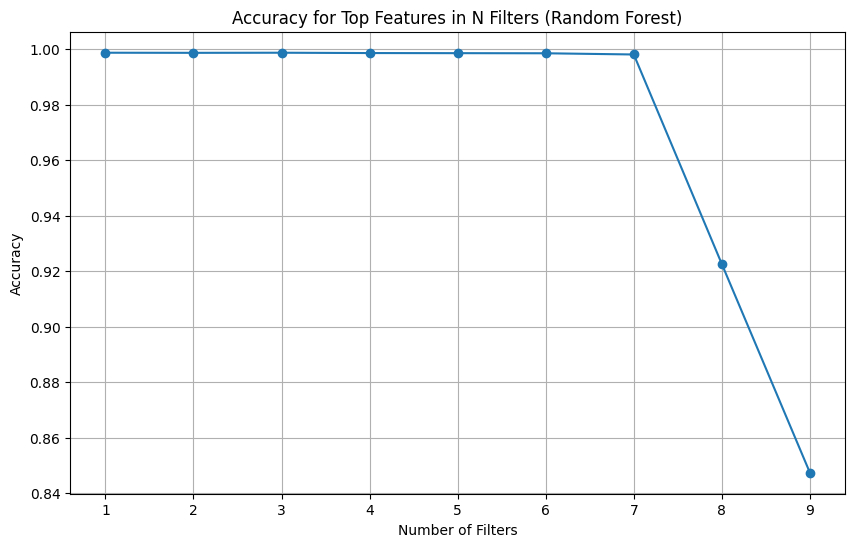


Decision Tree:
-------------
Number of Filters: 1, Accuracy: 0.9977
Number of Filters: 2, Accuracy: 0.9979
Number of Filters: 3, Accuracy: 0.9979
Number of Filters: 4, Accuracy: 0.9981
Number of Filters: 5, Accuracy: 0.9983
Number of Filters: 6, Accuracy: 0.9983
Number of Filters: 7, Accuracy: 0.9979
Number of Filters: 8, Accuracy: 0.9196
Number of Filters: 9, Accuracy: 0.8476
Number of Filters: 10, No features selected


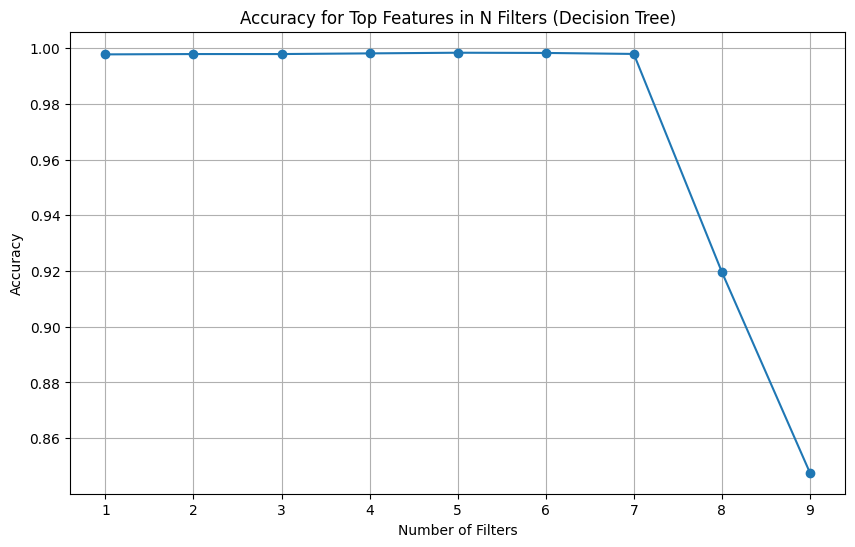


KNN:
---
Number of Filters: 1, Accuracy: 0.9958
Number of Filters: 2, Accuracy: 0.9962
Number of Filters: 3, Accuracy: 0.9962
Number of Filters: 4, Accuracy: 0.9968
Number of Filters: 5, Accuracy: 0.9960
Number of Filters: 6, Accuracy: 0.9959
Number of Filters: 7, Accuracy: 0.9942
Number of Filters: 8, Accuracy: 0.9066
Number of Filters: 9, Accuracy: 0.8366
Number of Filters: 10, No features selected


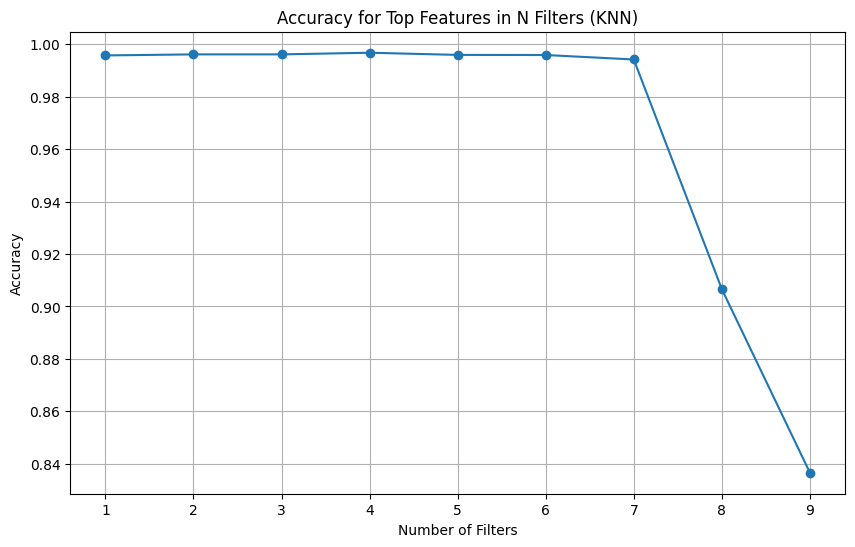

In [34]:
for classifier_name, classifier in classifiers.items():
    accuracy_results = {}
    print(f'\n{classifier_name}:\n{"-" * len(classifier_name)}')

    for n, features in features_in_n_filters.items():
        # Check if the list of features is empty
        if not features:
            print(f'Number of Filters: {n}, No features selected')
            continue

        X_train_selected = X_train[features]
        X_test_selected = X_test[features]

        accuracy = calculate_accuracy(classifier, X_train_selected, X_test_selected, y_train, y_test)
        accuracy_results[n] = accuracy

        print(f'Number of Filters: {n}, Accuracy: {accuracy:.4f}')

    plt.figure(figsize=(10, 6))
    plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
    plt.xlabel('Number of Filters')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Top Features in N Filters ({classifier_name})')
    plt.grid(True)
    plt.show()

In [35]:
for n, features in features_in_n_filters.items():
    print(f'Features in atleast {n} filters: {features}')

Features in atleast 1 filters: ['f32', 'f5', 'f4', 'f26', 'f1', 'f39', 'f3', 'f33', 'f6', 'f23', 'f38', 'f25', 'f12', 'f29', 'f34', 'f30', 'f35', 'f40', 'f36', 'f37', 'f24']
Features in atleast 2 filters: ['f32', 'f5', 'f4', 'f26', 'f39', 'f3', 'f33', 'f6', 'f23', 'f38', 'f25', 'f12', 'f29', 'f34', 'f30', 'f35', 'f36']
Features in atleast 3 filters: ['f32', 'f5', 'f4', 'f26', 'f39', 'f3', 'f33', 'f6', 'f23', 'f38', 'f25', 'f12', 'f29', 'f34', 'f30', 'f35']
Features in atleast 4 filters: ['f5', 'f4', 'f26', 'f39', 'f3', 'f33', 'f6', 'f23', 'f38', 'f25', 'f12', 'f29', 'f34', 'f30']
Features in atleast 5 filters: ['f5', 'f4', 'f26', 'f3', 'f33', 'f6', 'f38', 'f12', 'f29', 'f34', 'f30']
Features in atleast 6 filters: ['f5', 'f4', 'f3', 'f33', 'f6', 'f38', 'f12', 'f29', 'f34']
Features in atleast 7 filters: ['f5', 'f4', 'f3', 'f33', 'f38', 'f12', 'f29', 'f34']
Features in atleast 8 filters: ['f4', 'f33', 'f34']
Features in atleast 9 filters: ['f33']
Features in atleast 10 filters: []


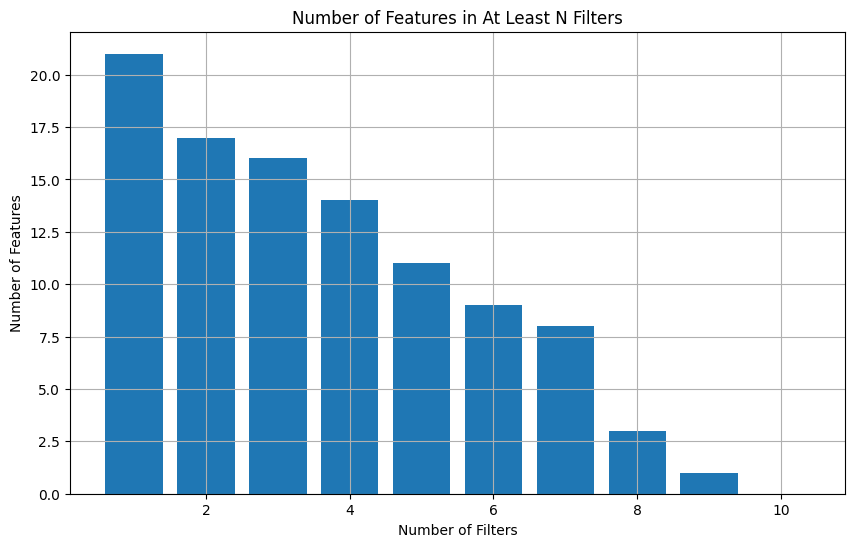

In [36]:
# Calculate the number of features in at least n filters
num_features_in_n_filters = {n: len(features) for n, features in features_in_n_filters.items()}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(num_features_in_n_filters.keys(), num_features_in_n_filters.values())
plt.xlabel('Number of Filters')
plt.ylabel('Number of Features')
plt.title('Number of Features in At Least N Filters')
plt.grid(True)
plt.show()